# Logistic Regression

Author: Nandini Sah

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [393]:
data = pd.read_csv("titanic.csv", index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [394]:
data.info() # what type of data is present in the data set

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Pre-processing of the dataset

In [395]:
data.nunique() # Columns with What no. of unique Values

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [396]:
data['Embarked'].value_counts() # if one value would have dominated the column, dropping the column would have been appropriate

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [397]:
data = data.drop(['Name', 'Ticket'], axis=1)  # too many unique values
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


In [398]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [399]:
# Since Cabin has almost 80% of the column empty, so droppping the column would be feasible since it poses close to no affect on the prediction

data = data.drop(['Cabin'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [400]:
test_data = data.sample(n=179, random_state=42)
train_data = data.drop(test_data.index)

In [401]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [402]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [403]:
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
710,1,3,male,29.0,1,1,15.2458,C
440,0,2,male,31.0,0,0,10.5000,S
841,0,3,male,20.0,0,0,7.9250,S
721,1,2,female,6.0,0,1,33.0000,S
40,1,3,female,14.0,1,0,11.2417,C


In [404]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [405]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,True,False,True
2,1,1,38.0,1,0,71.2833,False,False,False
3,1,3,26.0,0,0,7.9250,False,False,True
4,1,1,35.0,1,0,53.1000,False,False,True
5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
884,0,2,28.0,0,0,10.5000,True,False,True
885,0,3,25.0,0,0,7.0500,True,False,True
888,1,1,19.0,0,0,30.0000,False,False,True


In [406]:
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
710,1,3,29.0,1,1,15.2458,True,False,False
440,0,2,31.0,0,0,10.5000,True,False,True
841,0,3,20.0,0,0,7.9250,True,False,True
721,1,2,6.0,0,1,33.0000,False,False,True
40,1,3,14.0,1,0,11.2417,False,False,False
...,...,...,...,...,...,...,...,...,...
434,0,3,17.0,0,0,7.1250,True,False,True
774,0,3,29.0,0,0,7.2250,True,False,False
26,1,3,38.0,1,5,31.3875,False,False,True


In [407]:
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']

X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']

## Standarization

In [408]:
def zscore_normalize (X) :
    mu     = np.mean(X, axis=0) # Calculating the mean
    sigma  = np.std(X, axis=0)  # Calculating the standard deviation
    X_norm = (X - mu) / sigma 

    return X_norm

In [409]:
X_train = zscore_normalize(X_train)
X_test = zscore_normalize(X_test)

In [410]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0.813034,-0.554214,0.379923,-0.479342,-0.487864,0.724310,-0.303355,0.596817
2,-1.614136,0.676666,0.379923,-0.479342,0.745133,-1.380624,-0.303355,-1.675556
3,0.813034,-0.246494,-0.470722,-0.479342,-0.474867,-1.380624,-0.303355,0.596817
4,-1.614136,0.445876,0.379923,-0.479342,0.395003,-1.380624,-0.303355,0.596817
5,0.813034,0.445876,-0.470722,-0.479342,-0.472460,0.724310,-0.303355,0.596817
...,...,...,...,...,...,...,...,...
884,-0.400551,-0.092634,-0.470722,-0.479342,-0.425284,0.724310,-0.303355,0.596817
885,0.813034,-0.323424,-0.470722,-0.479342,-0.491716,0.724310,-0.303355,0.596817
888,-1.614136,-0.785003,-0.470722,-0.479342,-0.049800,-1.380624,-0.303355,0.596817


## Training of the Model

In [418]:
class Logistic_Regression:
    def __init__(self, learning_rate=0.01, num_iterations=100) :
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = 0
        self.loss_history=[]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logloss(self, h, y):
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):

        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        
        n_features = X.shape[1]
        self.weights = np.zeros(n_features, dtype=np.float64)
         
        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            
            h = self.sigmoid(z)
            
            weight_gradient = np.dot(X.T, (h - y)) / y.size
            bias_gradient = np.mean(h-y)
            
            self.weights -= self.learning_rate * weight_gradient
            self.bias -= self.learning_rate * bias_gradient

            loss = self.logloss(h, y)
            self.loss_history.append(loss)
            
            if i % 100 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def score(self, X, y):
        predictions = self.predict(X)
        return (predictions == y).mean()


In [419]:
model = Logistic_Regression(learning_rate=0.1, num_iterations=180)

In [420]:
model.fit(X_train, y_train)

Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 0.45950240953485544


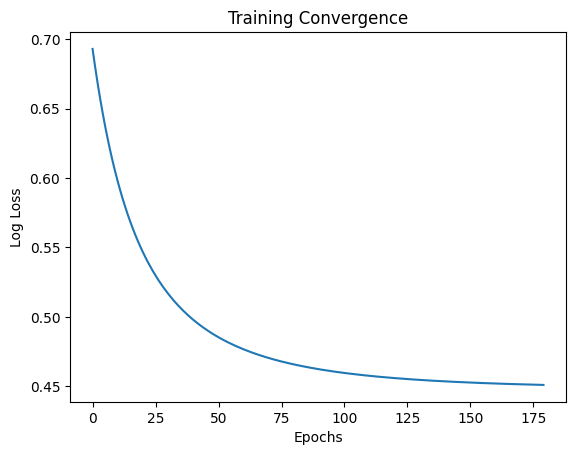

In [421]:
plt.plot(model.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training Convergence")
plt.show()

In [422]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7992
Test Accuracy: 0.7989


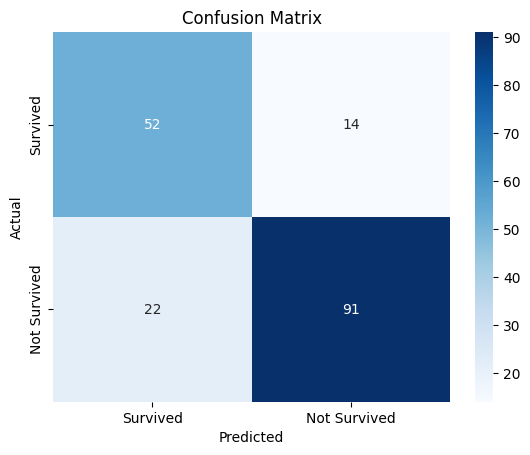

In [423]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False negativess
    
    return TN, FP, FN, TP  

TN, FP, FN, TP = confusion_matrix(y_test, model.predict(X_test))
cm = np.array([[TP, FP], [FN, TN]])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived', 'Not Survived'], yticklabels=['Survived', 'Not Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [424]:
def f1_score():
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    return 2 * ((precision * recall) / (precision + recall))

print(f"f1 Score: {f1_score()}")

f1 Score: 0.7428571428571429
